# Financial Engineering Systems I - Final Project 2023

---
---

In this project, $N$ is the number of time steps, $M$ is the number of paths generated
for the Brownian motion. For example, you could take $N = 100$ and $M = 10,000$.

## Part 1: Brownian motion and Black-Scholes Model

Import Dependencies

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### 1.1 Brownian Motion

#### Question 1.1.1
By using the rescaled random walk, build a program which gives one path of a Brownian motion on $[0,1]$ with a time subdivision $t_{i} = \frac{i}{N}$, $0\leq i\leq N$ and give an example of the value taken by $W_{1}$.

#### Solution 1.1.1

Let $(\Omega,\mathcal{F},\mathbb{P})$ be a probability space with sample space $\Omega$ and filtration $\mathcal{F} = \bigcup_{0\leq t\leq T}\mathcal{F}_{t}$, where $T<+\infty$ is fixed. We assume the state variables are $\mathcal{F}_{t}$-adapted.

$W: [0,T] \times\Omega\rightarrow\mathbb{R}$

A Brownian motion is a stochastic process $\{W_{t}\}_{t\in [0,T]}$ with continuous sample paths (almost surely), where $W_{0} = 0$, and $W$ has independent, Gaussian increments such that $W_{t} \sim N(0,t)$.

In [2]:
# Parameters
M = 1  # no. of simulations
n = 100  # no. of time steps
t = 1  # time

We denote the equation for a scaled random walk by: $W^{n}(t) = \frac{1}{\sqrt{n}}M_{nt}$

In [3]:
# Scaled random walk
rand_walk = [-1, 1]
steps = (1/np.sqrt(n)) * np.random.choice(rand_walk, size=(M,t*n)).T  # determines each move
origin = np.zeros((1,M))  # start
srw_paths = np.concatenate([origin, steps]).cumsum(axis=0)  # generates the paths

In [4]:
# Create an array of time steps for the 1 path
ticks = np.linspace(0, t, t*n+1)
print(np.size(ticks), np.size(srw_paths))

101 101


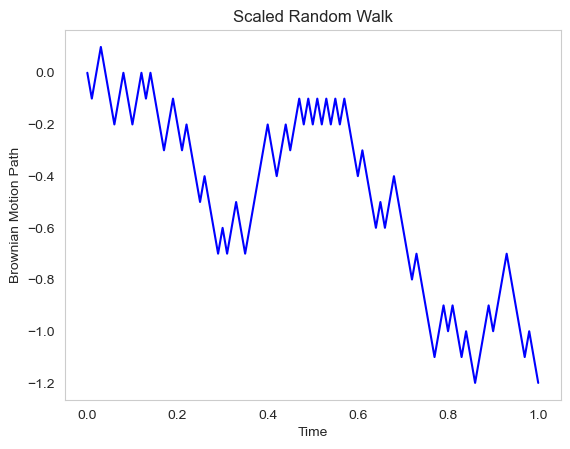

In [5]:
# Plot the paths
plt.rcParams.update({'axes.grid': False})

plt.plot(ticks, srw_paths, color='b')
plt.xlabel('Time')
plt.ylabel('Brownian Motion Path')
plt.title('Scaled Random Walk')
plt.show()

In [6]:
# Print the value of W_{1}
print(f'The value taken by W_{{1}} is {str(*srw_paths[-1])}.')

The value taken by W_{1} is -1.2.


---
**Let's create some simple functions to make our path generation process more efficient as we progress.**

In [7]:
# Define BM paths function
def bm_paths(M=1000, n=100, t=1, seed=0):
    """
    Function that generates BM paths sampled from a Gaussian distribution ~N(0, np.sqrt(dt)).
    :param M: no. of simulations
    :param n: no. of increments
    :param t: time
    :return: BM paths -> np.ndarray of shape (n+1, M)
    """
    dt = t/n  # time step

    # Simulations of BM
    np.random.seed(seed)  # Set random seed for reproducibility
    steps = np.random.normal(0, np.sqrt(dt), size=(M, n)).T
    origin = np.zeros((1, M))
    paths = np.concatenate([origin, steps]).cumsum(axis=0)  # M paths of a BM
    return paths


# Function to generate time step ticks for plotting
def x_ticks(M, n, t):
    """
    Function to generate the time-step ticks for plotting. No initial values force manual input.
    :param M: no. of simulations
    :param n: no. of increments
    :param t: time
    :return: uniform tick spacing pursuant to inputs -> np.ndarray of shape (n+1, M)
    """
    time = np.linspace(0, t, n+1)
    ticks = np.full(shape=(M, n+1), fill_value= time)
    ticks = ticks.T
    return ticks

---

#### Question 1.1.2
Generate $M$ paths of a Brownian motion and prove numerically that $\mathbb{E}[W_{t}] = 0$ and $Var(W_{t}) = t$ for different values of $t$.

#### Solution 1.1.2

In [8]:
# Generate paths w/ new parameters
bm_Q12 = bm_paths(M=10000, n=100, seed=56127)

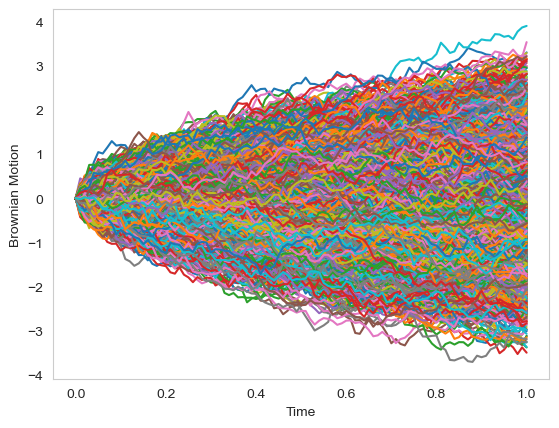

In [9]:
# Plot the paths
plt.plot(x_ticks(10000, 100, 1), bm_Q12)
plt.xlabel('Time')
plt.ylabel('Brownian Motion')
plt.show()

Expectation: $\mathbb{E}[W_{t}]$

In [10]:
# Expectation function to calculate mean at each time step
expectation = lambda x: np.mean(x, axis=0)
exp_bm_Q12 = [expectation(path) for path in bm_Q12[:]]

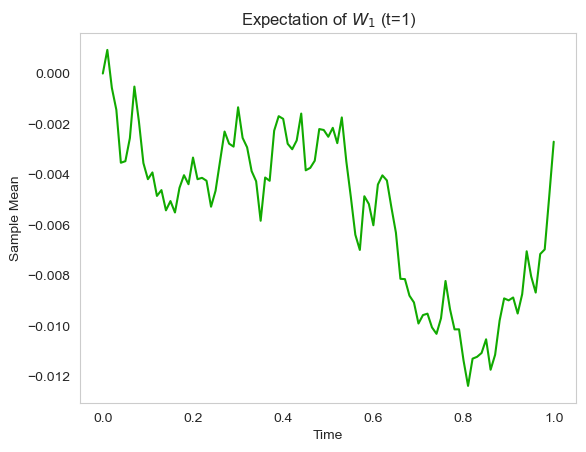

In [11]:
# Plot the sample expectations over time
plt.plot(ticks, exp_bm_Q12, color="#11aa00")
plt.xlabel('Time')
plt.ylabel('Sample Mean')
plt.title(f'Expectation of $W_{t}$ (t={t})')
plt.show()

In [12]:
# Print the final sample mean
print(f'The final sample mean is {round(exp_bm_Q12[-1], 3)}.')

The final sample mean is -0.003.


Variance: $Var(W_{t})$

In [13]:
# Variance function
variance = lambda x: np.var(x, axis=0)
var_bm_Q12 = [variance(path) for path in bm_Q12[:]]

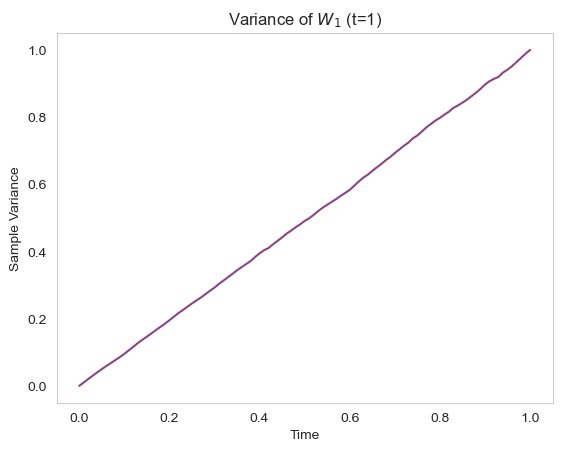

In [14]:
# Plot the sample variance over time
plt.plot(ticks, var_bm_Q12, color='#894585')
plt.xlabel('Time')
plt.ylabel('Sample Variance')
plt.title(f'Variance of $W_{t}$ (t={t})')
plt.show()

In [15]:
# Print the final sample variance
print(f'The final sample variance is {round(var_bm_Q12[-1], 3)}.')

The final sample variance is 1.002.


#### Question 1.1.3
Generate $M$ paths of a Brownian motion and prove numerically that $Cov(W_{t}, W_{s}) = \inf(t,s)$ for some value of $s,t$.

#### Solution 1.1.3

In [16]:
# Generate paths w/ new parameters
bm_Q13 = bm_paths(n=10, seed=194035)

# Assign the dimensions needed for cov matrix
dims = bm_Q13.shape[0]

In [17]:
# Covariance matrix
cov = np.zeros((dims, dims))
for i in range(len(bm_Q13)):
    for j in range(i, len(bm_Q13)):
        cov[i][j] = round(np.cov(bm_Q13[i][:], bm_Q13[j][:])[0][0], 3)
        cov[j][i] = cov[i][j]

# Convert to dataframe
cov = pd.DataFrame(cov).drop(index=0, columns=0)

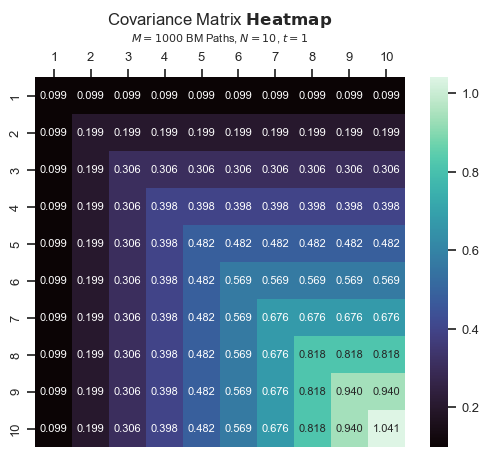

In [18]:
# Plot the covariance heatmap
with sns.axes_style('ticks'):
    sns.set_context("notebook", font_scale=.85)
    hm = sns.heatmap(cov, cbar=True, annot=True, square=True, fmt='.3f', annot_kws={'size': 8}, cmap='mako')
    plt.gca().set_title(r'Covariance Matrix $\bf{Heatmap}}$', fontsize=12, loc='center', y=1.12)
    hm.text(.5, 1.125, f'$M={bm_Q13.shape[1]}$ BM Paths, $N={bm_Q13.shape[0]-1}$, $t=1$', ha='center',
            va='top', transform=hm.transAxes, fontsize= 8)
    hm.set(xlabel="", ylabel="")
    hm.xaxis.tick_top()

By cutting away half of the matrix along the main diagonal leaving only the lower triangle, no information gets lost and the map might be easier to read.

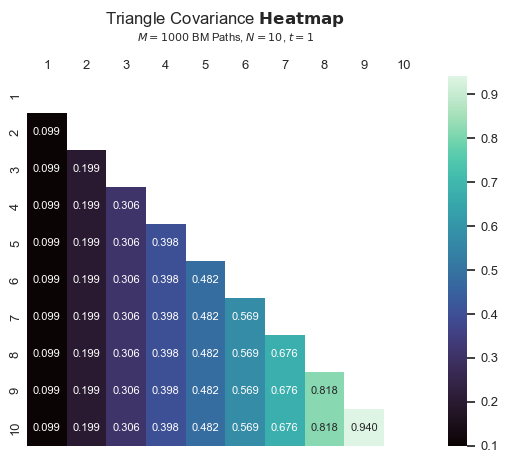

In [19]:
# Create a mask to isolate the upper triangle
mask = np.triu(np.ones_like(cov, dtype=bool))

# Plot the lower triangle heatmap
with sns.axes_style('white'):
    sns.set_context("notebook", font_scale=.85)
    hm = sns.heatmap(cov, mask=mask, fmt='.3f', annot=True, annot_kws={'size': 8}, cmap='mako')
    plt.gca().set_title(r'Triangle Covariance $\bf{Heatmap}}$', fontsize=12, loc='center', y=1.12)
    hm.text(.5, 1.125, f'$M={bm_Q13.shape[1]}$ BM Paths, $N={bm_Q13.shape[0]-1}$, $t=1$', ha='center',
            va='top', transform=hm.transAxes, fontsize= 8)
    hm.set(xlabel="", ylabel="")
    hm.xaxis.tick_top()
    hm.tick_params(length=0)

Observe that for each $s, t$ where $s \neq t$ in the matrix, covariance takes the infimum—or, greatest lower bound—of each subset.

#### Question 1.1.4
Compute numerically $[W, W ]_{t}$ and observe that $[W, W ]_{t} = t$ for $t = 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9$ and $t = 1$.

#### Solution 1.1.4

In [20]:
# Generate 1,000,000 paths w/ time steps of 0.1
bm_Q14 = bm_paths(M=1000000, n=10, seed=411658)

In [21]:
# Quadratic variation function
quad_var = lambda x: round(np.square(x[:-1] - x[1:]).sum(), 3)

In [22]:
# Compute the quadratic variation [W,W]_{t}
w_w = [quad_var(path) for path in bm_Q14.T[:]]
w_w = round(np.mean(w_w), 5)
print(f'[W,W]_{t} = {w_w}')

[W,W]_1 = 0.99955


Here, taking $t=1$ demonstrates the quadratic variation is $t$.

### 1.2 Black-Scholes Model

The Black-Scholes price is the solution to the following SDE under the risk-neutral probability measure:
$$ dS_{t} = rS_{t}dt + \sigma S_{t}dW_{t},\ S_{0}>0,\ r\geq 0,\ \sigma >0 $$
We denote the solution by $S$.

#### Question 1.2.1
By using the discretisation of the time $t_{i} = \frac{i}{N}$ with $0 \leq i\leq N$, we introduce the following Euler-Maruyama numerical scheme:
\begin{align*}
    \tilde{S}_{0} &= S_{0}  \\
    \tilde{S}_{t_{i+1}}−\tilde{S}_{t_{i}} &= \tilde{S}_{t_{i}}r(t_{i+1}−t_{i})+\tilde{S}_{t_{i}}\sigma (W_{t_{i+1}}−W_{t_{i}})
\end{align*}

Compare $\tilde{S}_{t}$ and $S_{0}e^{\sigma W_{t}+(r-\sigma^{2}/2)t}$ for some values of $t\in [0,1]$.

From now on, we choose the explicit solution to define the solution of the SDE:
$$
S_{t} = S_{0}e^{\sigma W_{t}+(r-\sigma^{2}/2)t}
$$

#### Solution 1.2.1

In [23]:
# Define a function for realising GBM paths
def gbm_paths(S0=100, r=0.1, sigma=0.3, M=1000, n=100, t=1, seed=0):
    """
    Function that generates GBM paths simulating a stock price.
    :param S0: stock price at t=0
    :param r: drift
    :param sigma: volatility
    :param M: no. of simulations
    :param n: no. of steps
    :param t: time
    :return: GBM paths -> np.ndarray of shape (n+1, M)
    """
    dt = t/n  # time steps

    # Simulations of stock price
    np.random.seed(seed)  # Set random seed for reproducibility
    St = np.exp((r - sigma ** 2 /2)*dt + sigma*np.random.normal(0, np.sqrt(dt), size=(M, n)).T)
    St = np.vstack([np.ones(M), St])  # array of ones

    # Product of S0 with the cumulative product of elements along each path
    St = S0 * St.cumprod(axis=0)
    return St

We simulate $1,000$ geometric Brownian motions for $S_{0}=100,\ r=0.1,\ \sigma=0.3$.

In [24]:
# Generate the GBM paths
gbm_Q21 = gbm_paths(seed=3512)

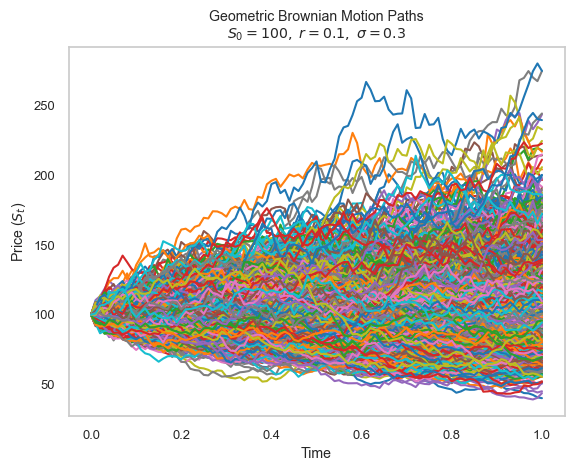

In [25]:
# Plot the simulated stock prices over time
plt.plot(x_ticks(1000, 100, 1), gbm_Q21)
plt.xlabel('Time')
plt.ylabel('Price ($S_{t}$)')
plt.title(
    'Geometric Brownian Motion Paths\n'
    '$S_{0}=100,\ r=0.1,\ \sigma=0.3$')
plt.show()